In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.special as spec

In [5]:
def flux_dist_cos(x,H):
    return np.cos(np.pi*x/(2*H))

def flux_dist_bessel(x,H):
    return spec.jv(0,x*2.405/H)

def flux_dist_sin(r,R):
    return R*np.sin(np.pi*r/R)/(np.pi*r)

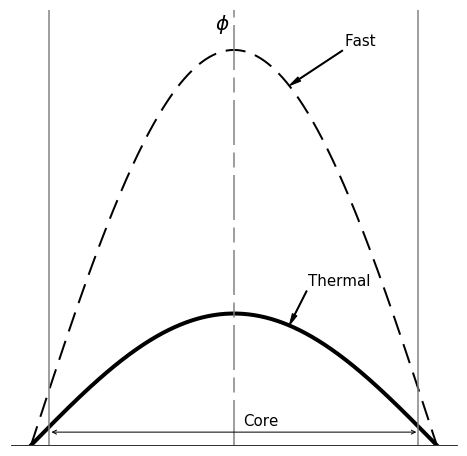

In [7]:
R = 1
R_tilde = R * 1.1

fast_scale = 3

x = np.linspace(-R_tilde,R_tilde,500)
y = flux_dist_cos(x,R_tilde)

ann_x = 0.3
ann_y_therm = flux_dist_cos(ann_x,R_tilde)
ann_y_fast = ann_y_therm * fast_scale


fig, ax = plt.subplots(figsize=(8,8))

# add annotated thermal flux plot
thermal, = ax.plot(x,y, label='Thermal flux',linewidth=4, color='black')
ax.annotate('Thermal', xy=(ann_x,ann_y_therm), xytext=(ann_x+0.1,ann_y_therm+0.3),fontsize=15,
            arrowprops=dict(facecolor='black',width=1,headwidth=5))

# add annotated fast flux plot
fast, = ax.plot(x,fast_scale*y, label='Fast flux', linewidth=2, dashes=[10,5], color='black')
ax.annotate('Fast', xy=(ann_x,ann_y_fast), xytext=(ann_x+0.3,ann_y_fast+0.3), fontsize=15,
            arrowprops=dict(facecolor='black',width=1,headwidth=5))

# add y-axis label
ax.text(-0.1,max(y)*fast_scale*1.05,'$\phi$', fontsize=20)

# add lines to indicate reactor boundary & centerline
left_bnd = plt.axvline(x=-1,color='grey')
cline = plt.axvline(x=0,dashes=[30,5,10,5],color='grey')
right_bnd = plt.axvline(x=1,color='grey')

ax.annotate('',xy=(-R,0.1),xytext=(R,0.1),arrowprops=dict(arrowstyle='<->'))
ax.text(0.05,0.15,'Core',fontsize=15)

# remove spines on top and sides
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove tick labels
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_minor_locator(ticker.NullLocator())

# set y range 
ax.set_ylim([0,max(y)*fast_scale*1.1])

plt.savefig('img/cos_flux.svg')
plt.show()
